In [37]:
reset -fs

Support Vector Machines (SVM)
------

<center><img src="images/support_svm.png" width="700"/></center>

Scikit Demo
-------

In [38]:
from sklearn import svm

In [39]:
X = [[8, 8], 
     [25, 25]]
 
y = ['orange', 'basketball']

In [40]:
import matplotlib.pyplot as plt

%matplotlib inline

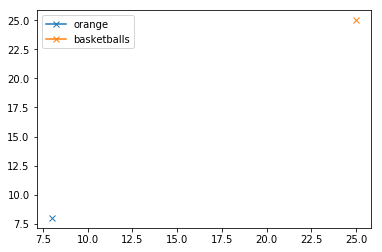

In [41]:
for i, row in enumerate(X):
    plt.plot(row[0], row[1], label=y[i], marker='x');
    
plt.legend();
plt.show();

In [42]:
# Define an instance of a SVM classifer
clf = svm.SVC()

In [52]:
# Estimate the classifer for our data
clf.fit(X, y);  

In [54]:
# After being fitted, the model can then be used to predict new values:

clf.predict([[2, 2]]).item()
# clf.predict([[30, 30]]).item()
# clf.predict([[16.0, 16.0]]).item()

'orange'

Check for understanding
-------

What are the support vectors in this example?

In [56]:
# Get support vectors
clf.support_vectors_

array([[25., 25.],
       [ 8.,  8.]])

Reference: http://scikit-learn.org/stable/modules/svm.html